### Problem Statement

Health insurance is a type of insurance that covers medical expenses that arise due to an illness.
Based on certain input features such as age , bmi,no of dependents ,smoker ,region appropriate insurance costs needs to be predicted.

In [52]:
#import packages for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
#import dataset using Github link
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [55]:
#view top few rows
df.head(16)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [56]:
#check number of rows and columns present in dataset
df.shape

(1338, 7)

In [57]:
#check number of columns present and their data type.
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [58]:
#check information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [59]:
# describe each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Exploratory Data Analysis

In [60]:
#check value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

#### Univariate Analysis

In [61]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [62]:
# Prepare list of columns names which contain numerical and categorical values
numerical_cols=['age','bmi','children','charges']
categorical_cols=['sex','smoker','region']

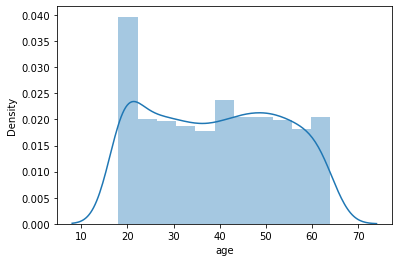

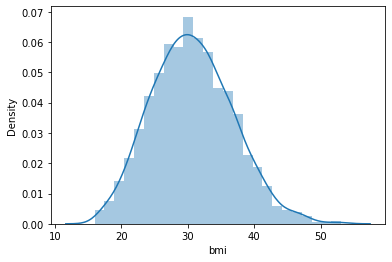

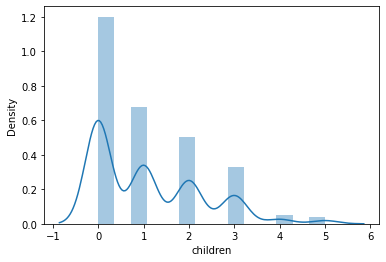

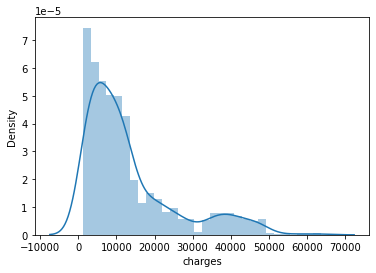

In [63]:
#Display distribution of all numrical_cols 
for i in numerical_cols:
    sns.distplot(df[i])
    plt.show()

bmi column has values closer to normal distribution

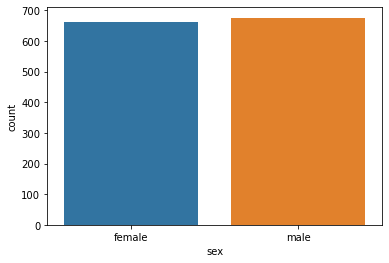

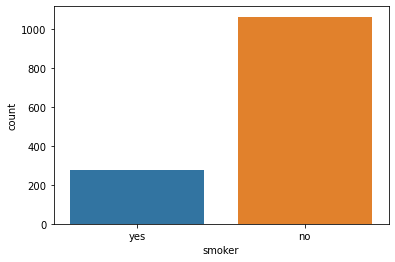

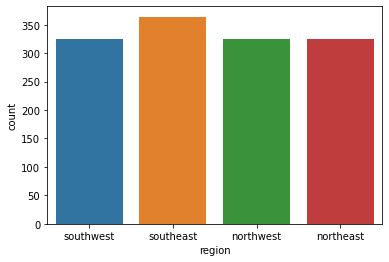

In [64]:
#Display value_counts of all categorical_cols 
for i in categorical_cols:
    sns.countplot(df[i])
    plt.show()

The number of smokers is relatively smaller than non-smokers

#### Bivariate Analysis

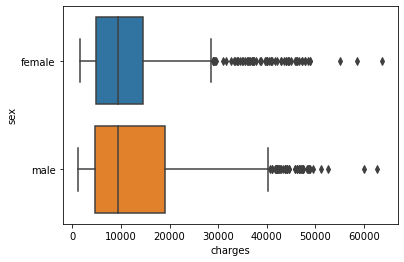

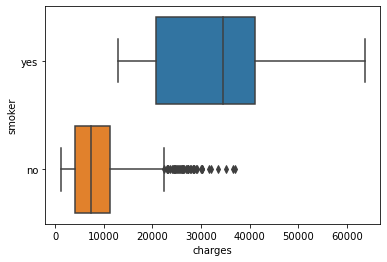

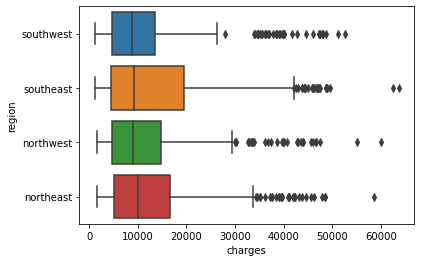

In [65]:
# For all categorical column compare the values ranges of charges(target variable)
for i in categorical_cols:
    sns.boxplot(x=df['charges'],y=df[i])
    plt.show()

The value range of column smoker if quite different. smoker column would be a important feature to predict charges.

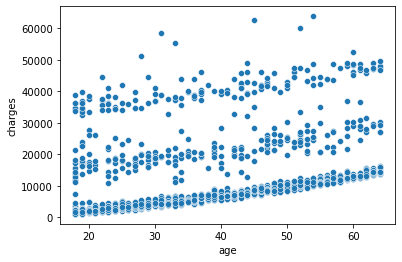

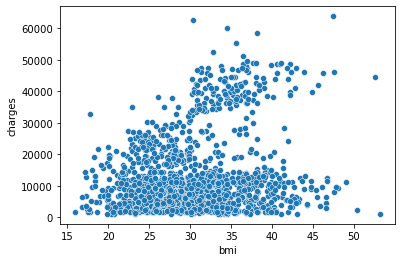

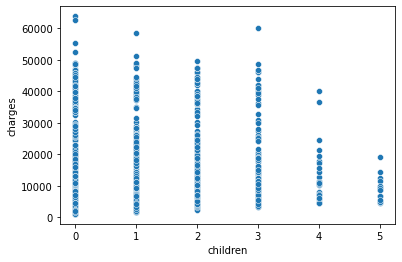

In [66]:
# for all numerical columns check how the chrges vary
for i in numerical_cols[:-1]:
    sns.scatterplot(y=df['charges'],x=df[i])
    plt.show()

#### Multivariate Analysis

<AxesSubplot:>

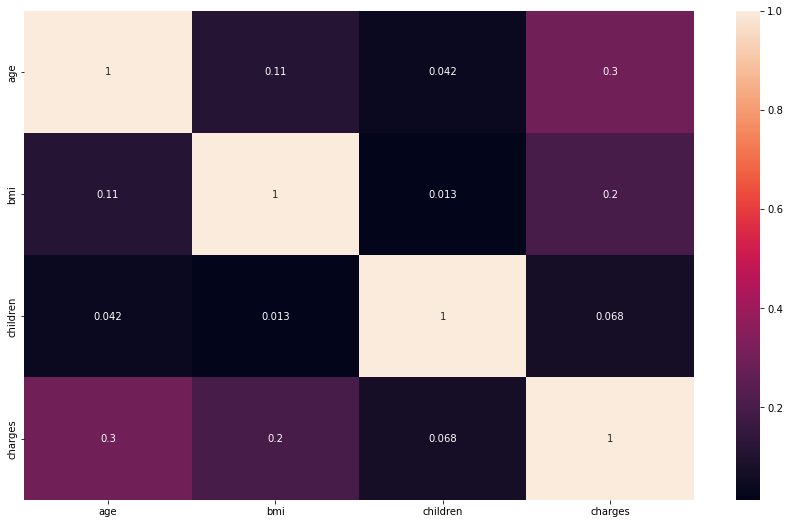

In [67]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

No single numeric column has high correlation with the charges column.

### Feature Engineering

In [68]:
#converting categorical features to numerical values
categorical_cols

['sex', 'smoker', 'region']

In [69]:
# map "female" to 0 and "male" to 1
df['sex']=df['sex'].map({'female':0,'male':1})

In [70]:
# map "yes" to 1 and "no" to 0
df['smoker']=df['smoker'].map({'yes':1,'no':0})

In [71]:
df["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [72]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [73]:
#one hot encoding of the region column
dfRegion=pd.get_dummies(df['region'],prefix="region")
dfRegion

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [74]:
# Concatenate the original dataframe with dataframe created for region values
df=pd.concat([df,dfRegion],axis=1)
df

,age,sex,bmi,children,smoker,region,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,0,1


In [75]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [77]:
# Create X with all independent variable
X=df[['age','sex','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']]
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [78]:
# Create y with only target variable(charges)
y=df["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [79]:
#Feature scaling
ss=StandardScaler()

In [84]:
# Apply standard scaler on only relevant columns
X[['age','bmi','children']]=ss.fit_transform(X[['age','bmi','children']])
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,0,0,0,1
1,-1.509965,1,0.509621,-0.078767,0,0,0,1,0
2,-0.797954,1,0.383307,1.580926,0,0,0,1,0
3,-0.441948,1,-1.305531,-0.908614,0,0,1,0,0
4,-0.513149,1,-0.292556,-0.908614,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,0,1,0,0
1334,-1.509965,0,0.206139,-0.908614,0,1,0,0,0
1335,-1.509965,0,1.014878,-0.908614,0,0,0,1,0
1336,-1.296362,0,-0.797813,-0.908614,0,0,0,0,1


In [85]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
7,1.425105,region_southeast
5,1.314644,region_northeast
6,1.292976,region_northwest
8,1.278919,region_southwest
2,1.106630,bmi
0,1.016822,age
4,1.012074,smoker
1,1.008900,sex
3,1.004011,children


As the VIF values are not very high there is no multicollinearity.

### Model Building

In [86]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [87]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
161,-1.509965,0,1.014878,-0.908614,1,0,0,1,0
618,-1.438764,0,0.401352,-0.908614,1,0,0,1,0
1312,-0.370746,1,2.007347,-0.078767,0,0,0,0,1
1328,-1.153959,0,-1.056183,0.751079,0,1,0,0,0
326,-0.869155,0,-1.222689,-0.078767,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
522,0.839674,0,0.533408,-0.908614,0,1,0,0,0
211,0.056461,1,0.034712,2.410772,0,0,1,0,0
934,-0.513149,1,1.069013,0.751079,0,0,0,1,0
1212,-1.509965,1,-1.508126,-0.908614,0,1,0,0,0


In [88]:
X_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
240,-1.153959,0,0.985350,0.751079,1,1,0,0,0
651,0.982076,0,1.466000,-0.078767,0,0,0,1,0
761,-1.153959,1,0.744205,-0.078767,0,0,0,0,1
836,-0.228344,1,0.137240,-0.908614,0,0,0,0,1
1147,-1.367563,0,0.206139,-0.908614,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
757,0.554869,0,-0.464803,-0.908614,1,0,0,1,0
608,-0.797954,1,-0.604241,0.751079,0,1,0,0,0
1268,-1.367563,0,0.432520,-0.908614,0,0,0,0,1
889,1.266881,1,0.486655,-0.078767,0,0,1,0,0


In [89]:
y_train

161     36149.48350
618     34439.85590
1312     4536.25900
1328    22395.74424
326      3561.88890
           ...     
522      9866.30485
211      8162.71625
934      4673.39220
1212     1702.45530
1199     4934.70500
Name: charges, Length: 1003, dtype: float64

In [90]:
y_test

240     38511.6283
651     10579.7110
761      2416.9550
836      4402.2330
1147     2261.5688
           ...    
757     23065.4207
608      4435.0942
1268     1880.4870
889     11945.1327
677     46130.5265
Name: charges, Length: 335, dtype: float64

#### Linear Regression

In [91]:
# Fit the Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [92]:
# Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([ 3.18755529e+04,  1.48430007e+04,  4.56505746e+03,  6.09148131e+03,
        3.97900992e+03,  2.68408680e+03,  9.44837768e+03,  3.20615563e+04,
        1.11830356e+04,  1.26503868e+04,  7.95961606e+03,  1.84474123e+04,
        1.09794981e+04,  3.45307564e+04,  1.23158718e+04,  1.07178328e+04,
        1.65194052e+03,  2.70040958e+04,  1.16077372e+04,  6.29887392e+03,
        6.46009099e+03,  3.16823826e+04,  3.21415190e+04,  1.38019888e+04,
        1.12564980e+04,  1.51874243e+04,  2.66815252e+04,  3.69525353e+03,
        1.19400349e+04,  1.11473394e+04,  5.05543733e+03,  2.19506575e+03,
        1.08570055e+04,  3.30975946e+03,  9.10601305e+03,  7.99999146e+03,
        3.19585523e+02,  3.28033538e+04,  4.21633491e+03,  2.81020397e+03,
        2.46194653e+04,  3.56159082e+04,  2.01152003e+03,  3.96577355e+04,
        1.14261595e+04,  9.94502927e+03,  1.04705049e+04,  8.49790671e+03,
        1.32512887e+04,  2.84932601e+04,  1.67705220e+04,  1.16386255e+04,
        6.02868156e+03,  

In [93]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

36830524.35218556

In [94]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.7395400480823424

<AxesSubplot:xlabel='charges'>

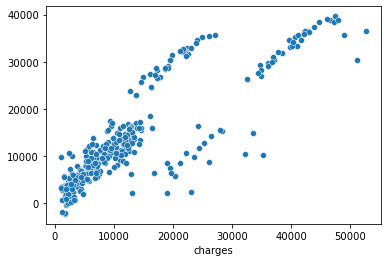

In [95]:
# Plot actual value vs predicted value to visually see how good the predictions are
sns.scatterplot(x=y_test,y=y_test_pred)

R2 score using linear regression model is 0.74. The visual representation doesn't show the predicted value that close to the actual values.

#### Random Forest

In [96]:
# Fit the Random Forest Regressor model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([38177.8545892 , 12491.2766242 ,  4779.7291303 ,  4772.8830412 ,
        2173.411153  ,  1778.0815865 , 12255.2279096 , 37970.2284558 ,
       13680.574477  , 11108.9199622 ,  6862.5824964 , 16125.639276  ,
        9300.3163568 , 40601.8707368 ,  9905.2965685 ,  8993.8518653 ,
        2889.1685192 , 35431.3511561 ,  9683.943604  , 15100.6160396 ,
       13544.5886459 , 27855.9145803 , 28591.7859859 ,  8572.4648081 ,
       17029.2053428 , 10175.3340474 , 20149.9320475 ,  2465.5057839 ,
       13391.9204201 ,  8843.0012847 ,  4414.3991864 ,  2843.9195579 ,
        8018.5302817 ,  5483.6033051 , 15296.3668264 , 10843.315454  ,
        2487.7764662 , 29176.1230552 ,  4364.9814292 ,  2838.6223685 ,
       16997.839193  , 44319.5596846 ,  5198.3779274 , 46177.205034  ,
        9986.7687431 ,  7013.1822003 , 11503.3224593 , 12812.0385197 ,
       11555.3728176 , 29123.5226719 , 16683.5207926 ,  9741.2920849 ,
        5212.6443196 , 44960.5270994 , 23880.0745623 ,  9414.6115709 ,
      

In [98]:
# Display the mean squared error on test data
mean_squared_error(y_test,y_test_pred)

23365787.879717555

In [99]:
# Display the R2 score on test data
r2_score(y_test,y_test_pred)

0.8347606477313625

<AxesSubplot:xlabel='charges'>

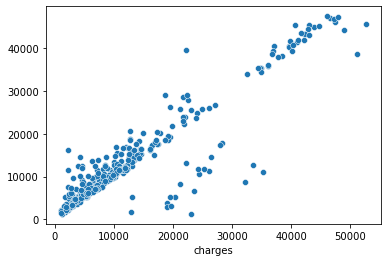

In [100]:
sns.scatterplot(x=y_test,y=y_test_pred)

R2 score using linear regression model is 0.83. The visual representation show the predicted value are closer to the actual values in lot of datapoints.
The Random Forest model is better than Linear Regression model.